In [106]:
import pandas as pd
import numpy as np,scipy as sp
import csv,os,sys
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
import datetime as dt 

In [4]:
input_data_csv='/Users/crowledj/Downloads/shop_data_assessment/shop_data.csv';
shop_data= pd.read_csv(input_data_csv) 

In [5]:
#Look at size of dataset and no. of variables :
print ('Dataset:' , 'full_input_data:' , shop_data.shape);

Dataset: full_input_data: (1150000, 13)


In [97]:
## Q 1. 

purchaseSum = shop_data.groupby(['id','date']).purchaseamount.sum();
# shop_data_new = pd.concat([shop_data, purchaseSum], axis=1) 
purchaseSum.head()

id     date      
86246  2012-03-02    210.51
       2012-03-03     47.59
       2012-03-04     32.38
       2012-03-05     34.99
       2012-03-06    182.33
Name: purchaseamount, dtype: float64

In [11]:
# Q.2. 
# want to peak @ the data again first 
shop_data.head()


,Unnamed: 0,Unnamed: 0.1,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,0,0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,1,1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59
2,2,2,86246,205,97,9753,1022027929,0,2012-03-02,1.0,CT,1,5.99
3,3,3,86246,205,25,2509,107996777,31373,2012-03-02,16.0,OZ,1,1.99
4,4,4,86246,205,55,5555,107684070,32094,2012-03-02,16.0,OZ,2,10.38


In [125]:
# 2. Create a column that shows the number of previous visits per customer. 
#num_visits= shop_data.groupby('id').count();
#shop_data['visit_count']

#shop_data.groupby('id', as_index=True).visit_count.count()
#num_visits[:50]

#shop_data['visit_count'] = shop_data.groupby('id').cumcount('id');
visit_counts = shop_data.groupby('id').size()
## quick check on print of series output
#shop_data.head(15250).tail(500)
#shop_data.tail(1250)
visit_counts


id
86246       12609
86252       12087
12262064     1101
12277270     1361
12332190      684
12524696      985
12682470      806
12996040      326
13074629     1374
13089312     1218
13179265      903
13251776     2391
13387341      889
13501141     2326
13540129     1139
13558712      532
13563017      442
13584134      547
13744500     2232
13807224     1304
13873775     1463
13974451      144
14026320      690
14049441      448
14088807      680
14101174      552
14278542      404
14381137      515
14576147      817
14632152      112
            ...  
97657346     1384
97661544      471
97664263     1128
97667024     1202
97669999      176
97671336      344
97671517     1383
97674711     1409
97676374      475
97680900      450
97682960     1293
97684130      537
97697018     2012
97698632      954
97703003      781
97724049     2754
97724346     1266
97737931       93
97751353      502
97752092      374
97754530      233
97760033      344
97763155     1391
97763238      805
9777103

In [13]:
# Q 3.  ????
# SQL query that would create a table (column) of the visit count per id as in pandas above.
# NOTE : 'shop' is the name of the tabular data in the .csv for SQl to handle
# I. tested this in my terminal with sqlite3 and it ,matches the pandas expression. previous to it.
SELECT count(date) FROM shop GROUP BY id;

pandas.core.series.Series

In [57]:
#Q.4 
# shop_data['purchase_rolling~Sum'] = shop_data.groupby('id','dept' == 99).cumcount('purchaseamount');
shop_data[pd.Dataframe(stuff)['dept'] == 99]['purchaseamount'].cumsum()

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [46]:
stuff= shop_data.groupby('id')

In [44]:
print ('Dataset:' , 'full_input_data:' , stuff.shape);

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [59]:
#Q. 5 

shop_data_distince_days = shop_data.drop_duplicates(subset=['date'])

In [60]:
shop_data_distince_days.head()

,Unnamed: 0,Unnamed: 0.1,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,visit_count
0,0,0,86246,205,7,707,1078778070,12564,2012-03-02,12.00,OZ,1,7.59,0
52,52,52,86246,205,8,809,101300010,8164,2012-03-03,12.00,OZ,1,1.29,52
59,59,59,86246,205,36,3601,104900040,3809,2012-03-04,20.00,OZ,1,1.69,59
71,71,71,86246,205,64,6408,108289686,6276,2012-03-05,0.75,LT,1,8.29,71
77,77,77,86246,205,70,7002,1030813737,25162,2012-03-06,30.00,CT,1,2.39,77


In [61]:
distict_visit_counter = shop_data_distince_days.groupby('id').cumcount('')


In [63]:
type(distict_visit_counter)
#distict_visit_counter


pandas.core.series.Series

In [88]:
#pd.Dataframe(distict_visit_counter)
#Q. 5 Continued ...
distict_visit_countDaysUniq = shop_data.groupby('id')['date'].nunique();
#distict_visit_counterCol = shop_data_distince_days.groupby('id').count();

distict_visit_countDaysUniq

id
86246       381
86252       368
12262064    237
12277270    184
12332190    113
12524696    161
12682470    141
12996040     39
13074629    147
13089312    132
13179265     92
13251776    134
13387341    147
13501141    132
13540129    254
13558712    116
13563017     97
13584134     56
13744500     94
13807224    152
13873775    112
13974451     19
14026320    112
14049441    119
14088807     52
14101174     30
14278542     77
14381137     39
14576147     76
14632152     33
           ... 
97657346    163
97661544    164
97664263     76
97667024     91
97669999     32
97671336     79
97671517    118
97674711     66
97676374     80
97680900     86
97682960     67
97684130     62
97697018    140
97698632    106
97703003    121
97724049    238
97724346     70
97737931     31
97751353     30
97752092    145
97754530     32
97760033     44
97763155    142
97763238     72
97771034    175
97771975    117
97776300     89
97781522    101
97782380     32
97795325    134
Name: date, Length: 1

# Q5 

plt.plot(distict_visit_countDaysUniq[0],distict_visit_countDaysUniq[1])


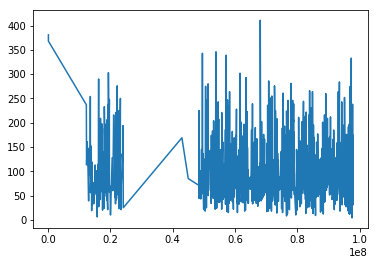

In [96]:
#distict_visit_counter.to_frame().reset_index();
#Q5 still  - HIstogrm - frequecy distribution of each customer - distinct day visits:
ploTQ5histo=pd.Series.plot(distict_visit_countDaysUniq)
plt.plot(distict_visit_countDaysUniq)

In [67]:
distict_visit_count = shop_data_distince_days.groupby('id').count()

In [69]:
distict_visit_count.head()

,Unnamed: 0,Unnamed: 0.1,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,visit_count
id,,,,,,,,,,,,,
86246,381,381,381,381,381,381,381,381,381,377,381,381,381
86252,31,31,31,31,31,31,31,31,31,31,31,31,31
12262064,40,40,40,40,40,40,40,40,40,40,40,40,40
12277270,5,5,5,5,5,5,5,5,5,5,5,5,5
12332190,5,5,5,5,5,5,5,5,5,5,5,5,5


In [138]:
# Q. 7 function that 'looks into future'

# Not entirely sure what 'looks into future' means here , but I asssume it is referring to analytical model that , 
# when applied to data in this dataset it can use today's" data to 'predict' the nature of the following 5 days(which is technically known in advance ??)

# start with aggregating dates per customer id :
agg_purcaheQuants_per_id = shop_data.groupby('date')['purchasequantity'].mean();
#type(agg_purcaheQuants_per_id)  #.to_frame().aggregate({'purchasequantity',np.sum})
agg_purcaheQuants_per_id

def fiveRFowsPredict(data):
    
    for indx in range(data.size()-5):
        Sum=0
        # store the day from the current rows date as an integer
        date_day = int(data.loc[indx,"date"].split('/')[-1])
        for indx_window in range(0,5):
            Sum + = data.loc[indx_window,"purchasequantity"] 
            
            # Define some 'predictive' condition that says if the average no. of purchases in a 5 day 
            # period greater than 0 then they will yield a '1' value, AND we are @ 5 business days later
            last_day= data.loc[indx_window,"date"].split('/')[-1])
            if Sum/5 > 0 and (last_day == date_day +5:
                              # append to new column appropriately:
                              data.loc[indx,"future_look"] = 1
            else:
                              
                              data.loc[indx,"future_look"] = 0
                              
           return data                   
    
    

ValueError: No axis named date for object type <class 'type'>

In [54]:
# Q 8. histogram of daily spending per customer : ??
purchaseSumperDay = shop_data.groupby(['date']).purchaseamount.sum();
purchaseSumperDay.head()


date
2012-03-02    13549.83
2012-03-03    11718.47
2012-03-04    15462.87
2012-03-05    10567.91
2012-03-06    10167.25
Name: purchaseamount, dtype: float64

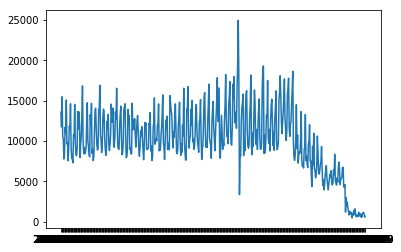

In [53]:
# Q 8. continued...
plt.plot(shop_data['date'].unique(),purchaseSumperDay)

In [111]:
# Q. 09. - use pd Diff to create a new column with shift in dates from previous row :

#shop_data['date_shift'] = shop_data.groupby('id')['date'].diff()

#shop_data['diff'] = shop_data['date'].sub(shop_data['date'].shift(-1)) #(shop_data['date'] / np.datetime64(1, 'D')) - (shop_data['date'] / np.datetime64(1, 'D'))#).shift(-1)
shop_data['shift'] = shop_data['date'].shift(1)

In [112]:
shop_data['shift'].head()

0           NaN
1    2012-03-02
2    2012-03-02
3    2012-03-02
4    2012-03-02
Name: shift, dtype: object

In [ ]:
#Q . 10 

In [ ]:
#Q . 11 

In [ ]:
# Q .12. 
##   1. What other data do you wish you could have had access to?
#    2. In your opinion, what would the company holding this data care about?
#    3. What would be your target variable (label)?
#    4. What machine learning algorithm would you implement and why?
#    5. What type of visualization would be helpful?
# 
# Ans. 1.  Some info. on the customers would have been useful - in order to give more'personality' to the dataset. Eg. the 
# gender and age of the customers - this kind of data would help with future marketing changhes etc. As certain demogrphics
# could be targeted better given their spending. performance here.

# A2.  The company holding this data would care about attracting more visits and spend from the low frequency/spending customers
#  And also retaining the high freq & spending customers.

# A3.  the target variable here for me would be possibly average spend per visit. With of course the view to increasing this

# A4.  given I have chosen the continous target in 3 above, ineed to. choose an ML alg. that is good with regressive data.
#. I think. an LDT , most likely a random forest could be a good choice here. As it handles this kind of data well and also it is much more transparent/debuggable than 
# eg . a deep NN.  Each of the new columns created in the exercise could be new features to split uopon in the Decision trees.

# A. 5 A v. useful visualization not in this EDA & to driuve feature selection for anML algorithm would be Correlatrion type matrix visualization.
# this would be quite constructive in seeingwhat existing features (columns) or constructed features are helpful - by examimning
# their correlation with the target/ label variable.